<a href="https://colab.research.google.com/github/pri538/ML-Projects/blob/main/YT_Channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("deep")

In [ ]:
df=pd.read_csv('/content/YT_ds_channels.csv')
df.head()

,youtuber,id,uploads,subscribers,video views,country,account created,estimated monthly income
0,3Blue1Brown,@3blue1brown,127,4.91M,316927667,US,"Mar 3rd, 2015",$844 - $13.5K
1,Joma Tech,@jomaoppa,107,2.06M,164892515,US,"Aug 31st, 2016",$711 - $11.4K
2,The Coding Train,@thecodingtrain,1210,1.54M,110960063,US,"Jul 3rd, 2006",$229 - $3.7K
3,sentdex,@sentdex,1233,1.2M,107212166,US,"Dec 16th, 2012",$214 - $3.4K
4,Tech With Tim,@techwithtim,772,1.14M,102224704,CA,"Apr 23rd, 2014",$516 - $8.3K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   youtuber                  30 non-null     object
 1   id                        30 non-null     object
 2   uploads                   30 non-null     int64 
 3   subscribers               30 non-null     object
 4   video views               30 non-null     int64 
 5   country                   30 non-null     object
 6   account created           30 non-null     object
 7   estimated monthly income  30 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.0+ KB


In [ ]:
df.describe(include='all')

,youtuber,id,uploads,subscribers,video views,country,account created,estimated monthly income
count,30,30,30.000000,30,3.000000e+01,30,30,30
unique,30,30,NaN,30,NaN,7,30,30
top,3Blue1Brown,@3blue1brown,NaN,4.91M,NaN,US,"Mar 3rd, 2015",$844 - $13.5K
freq,1,1,NaN,1,NaN,20,1,1
mean,NaN,NaN,387.633333,NaN,4.099272e+07,NaN,NaN,NaN
std,NaN,NaN,403.531094,NaN,6.722583e+07,NaN,NaN,NaN
min,NaN,NaN,32.000000,NaN,2.521440e+05,NaN,NaN,NaN
25%,NaN,NaN,137.500000,NaN,2.771000e+06,NaN,NaN,NaN
50%,NaN,NaN,226.500000,NaN,1.110823e+07,NaN,NaN,NaN
75%,NaN,NaN,427.500000,NaN,4.828713e+07,NaN,NaN,NaN


In [ ]:
subs_arr = df["subscribers"]
new_subs = []
for i in range(len(subs_arr)):
    prefix = subs_arr[i][-1]
    sub_count = subs_arr[i][:-1]
    if prefix == "M":
        new_subs.append(float(sub_count) * 1000000)
    if prefix == "K":
        new_subs.append(float(sub_count) * 1000)

df_copy = df.copy()
df_copy["subscribers"] = new_subs

In [ ]:
yrs_arr = df["account created"]
new_yrs = []
for i in range(len(yrs_arr)):
    new_yrs.append(yrs_arr[i].split(" ", -1)[-1])
    # break

df_copy["year_created"] = new_yrs

In [ ]:
import re

income = df["estimated monthly income"]
min_income, max_income, avg_income = [],[],[]
for i in range(len(income)):

    min_val = float(re.findall(r'\d+', income[i])[0])
    min_income.append(min_val)

    inc1 = income[i].split("- ", 1)[-1]
    inc1 = inc1[1:]

    if inc1[-1] == "K":
        max_val = float(inc1[0:-1])*1000

    max_income.append(max_val)

    avg_income.append((min_val+max_val)/2)
df_copy["min_income"], df_copy["max_income"], df_copy["avg_income"] = min_income, max_income, avg_income

In [ ]:
df_copy = df_copy.rename(columns={"video views": "total_veiws"})

df_copy['subscribers'] = df_copy['subscribers'].astype(int)
df_copy['min_income'] = df_copy['min_income'].astype(int)
df_copy['max_income'] = df_copy['max_income'].astype(int)
df_copy['avg_income'] = df_copy['avg_income'].astype(int)

In [ ]:
df_copy.drop(['account created', 'estimated monthly income'], axis=1, inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   youtuber      30 non-null     object
 1   id            30 non-null     object
 2   uploads       30 non-null     int64 
 3   subscribers   30 non-null     int64 
 4   total_veiws   30 non-null     int64 
 5   country       30 non-null     object
 6   year_created  30 non-null     object
 7   min_income    30 non-null     int64 
 8   max_income    30 non-null     int64 
 9   avg_income    30 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [ ]:
df_copy.isna().sum()

youtuber        0
id              0
uploads         0
subscribers     0
total_veiws     0
country         0
year_created    0
min_income      0
max_income      0
avg_income      0
dtype: int64

In [ ]:
df_copy.describe()

,uploads,subscribers,total_veiws,min_income,max_income,avg_income
count,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000
mean,387.633333,5.923737e+05,4.099272e+07,158.866667,3800.000000,1979.233333
std,403.531094,9.654415e+05,6.722583e+07,212.030696,2816.943807,1505.008436
min,32.000000,6.150000e+03,2.521440e+05,0.000000,1600.000000,850.000000
25%,137.500000,5.717500e+04,2.771000e+06,11.750000,1700.000000,860.250000
50%,226.500000,2.515000e+05,1.110823e+07,77.500000,3500.000000,1858.500000
75%,427.500000,7.210000e+05,4.828713e+07,217.500000,4000.000000,2014.500000
max,1600.000000,4.910000e+06,3.169277e+08,844.000000,13500.000000,7172.000000


In [ ]:
df_copy.head()

,youtuber,id,uploads,subscribers,total_veiws,country,year_created,min_income,max_income,avg_income
0,3Blue1Brown,@3blue1brown,127,4910000,316927667,US,2015,844,13500,7172
1,Joma Tech,@jomaoppa,107,2060000,164892515,US,2016,711,11400,6055
2,The Coding Train,@thecodingtrain,1210,1540000,110960063,US,2006,229,3700,1964
3,sentdex,@sentdex,1233,1200000,107212166,US,2012,214,3400,1807
4,Tech With Tim,@techwithtim,772,1140000,102224704,CA,2014,516,8300,4408


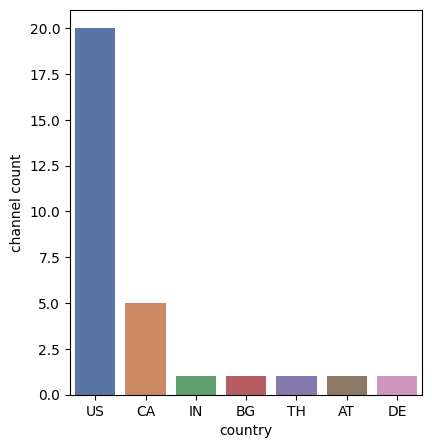

In [ ]:
plt.figure(figsize=(10, 5))
countries = df_copy["country"].value_counts()

plt.subplot(1, 2, 1)
sns.barplot(data=df_copy, y=countries, x=df_copy["country"].unique(), palette=palette)
plt.xlabel('country')
plt.ylabel('channel count')
plt.show()

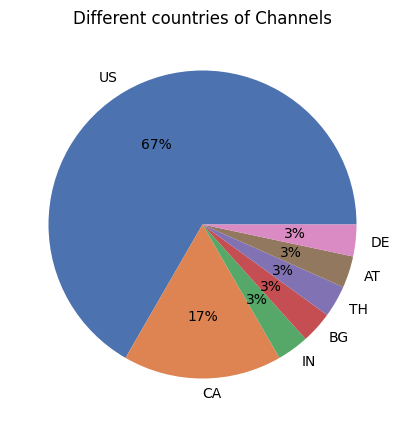

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(data=df_copy, x=countries, labels=df_copy["country"].unique(), autopct='%.0f%%', colors=palette)
plt.title("Different countries of Channels")
plt.show()

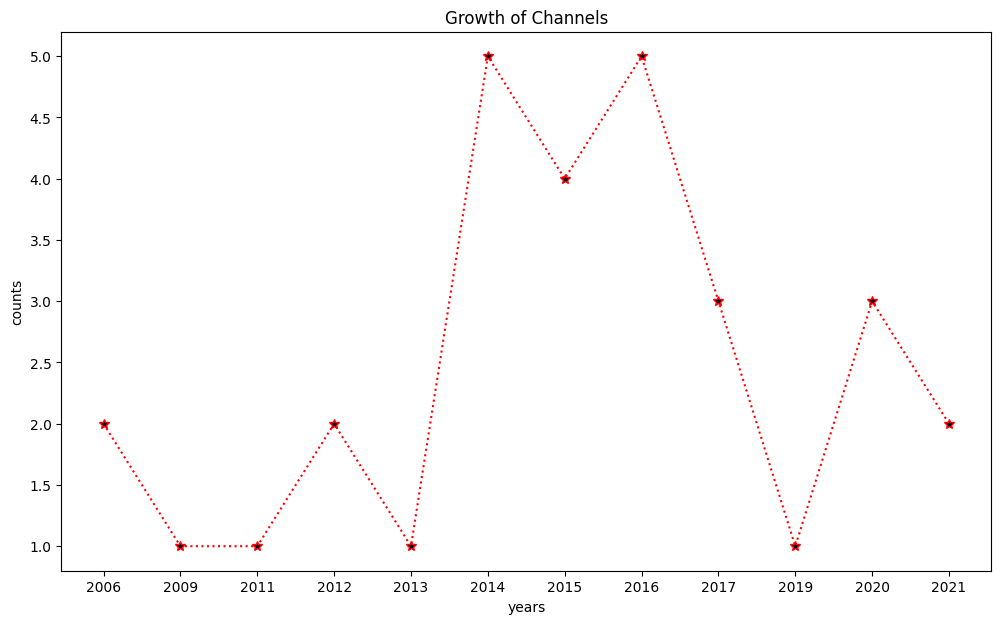

In [ ]:
plt.figure(figsize=(12, 7))

years_count = df_copy.groupby(['year_created']).count()
years_count.iloc[:, 0].values

plt.plot(years_count.iloc[:, 0].index, years_count.iloc[:, 0].values, linestyle = ':', marker="*", color='red',
         markerfacecolor='black', markersize=7)
plt.xlabel('years')
plt.ylabel('counts')
plt.title("Growth of Channels")

plt.show()

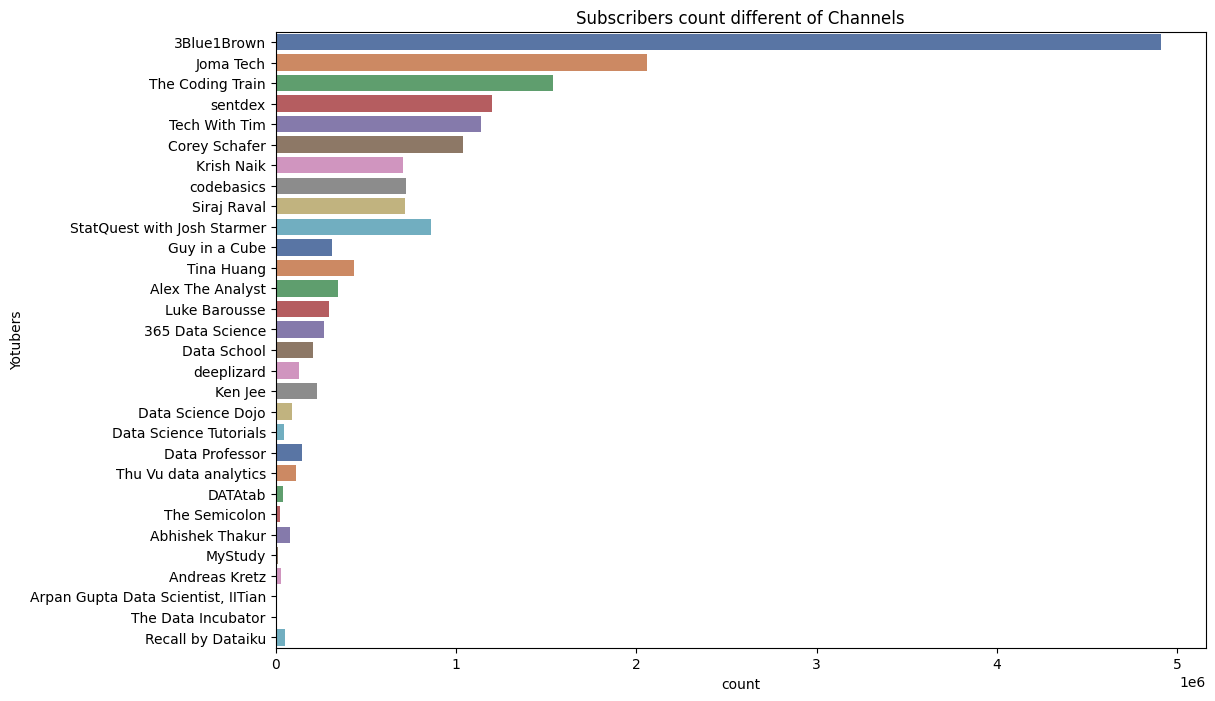

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x=df_copy['subscribers'], y=df_copy['youtuber'], palette=palette)
plt.xlabel('count')
plt.ylabel('Yotubers')
plt.title("Subscribers count different of Channels")

plt.show()

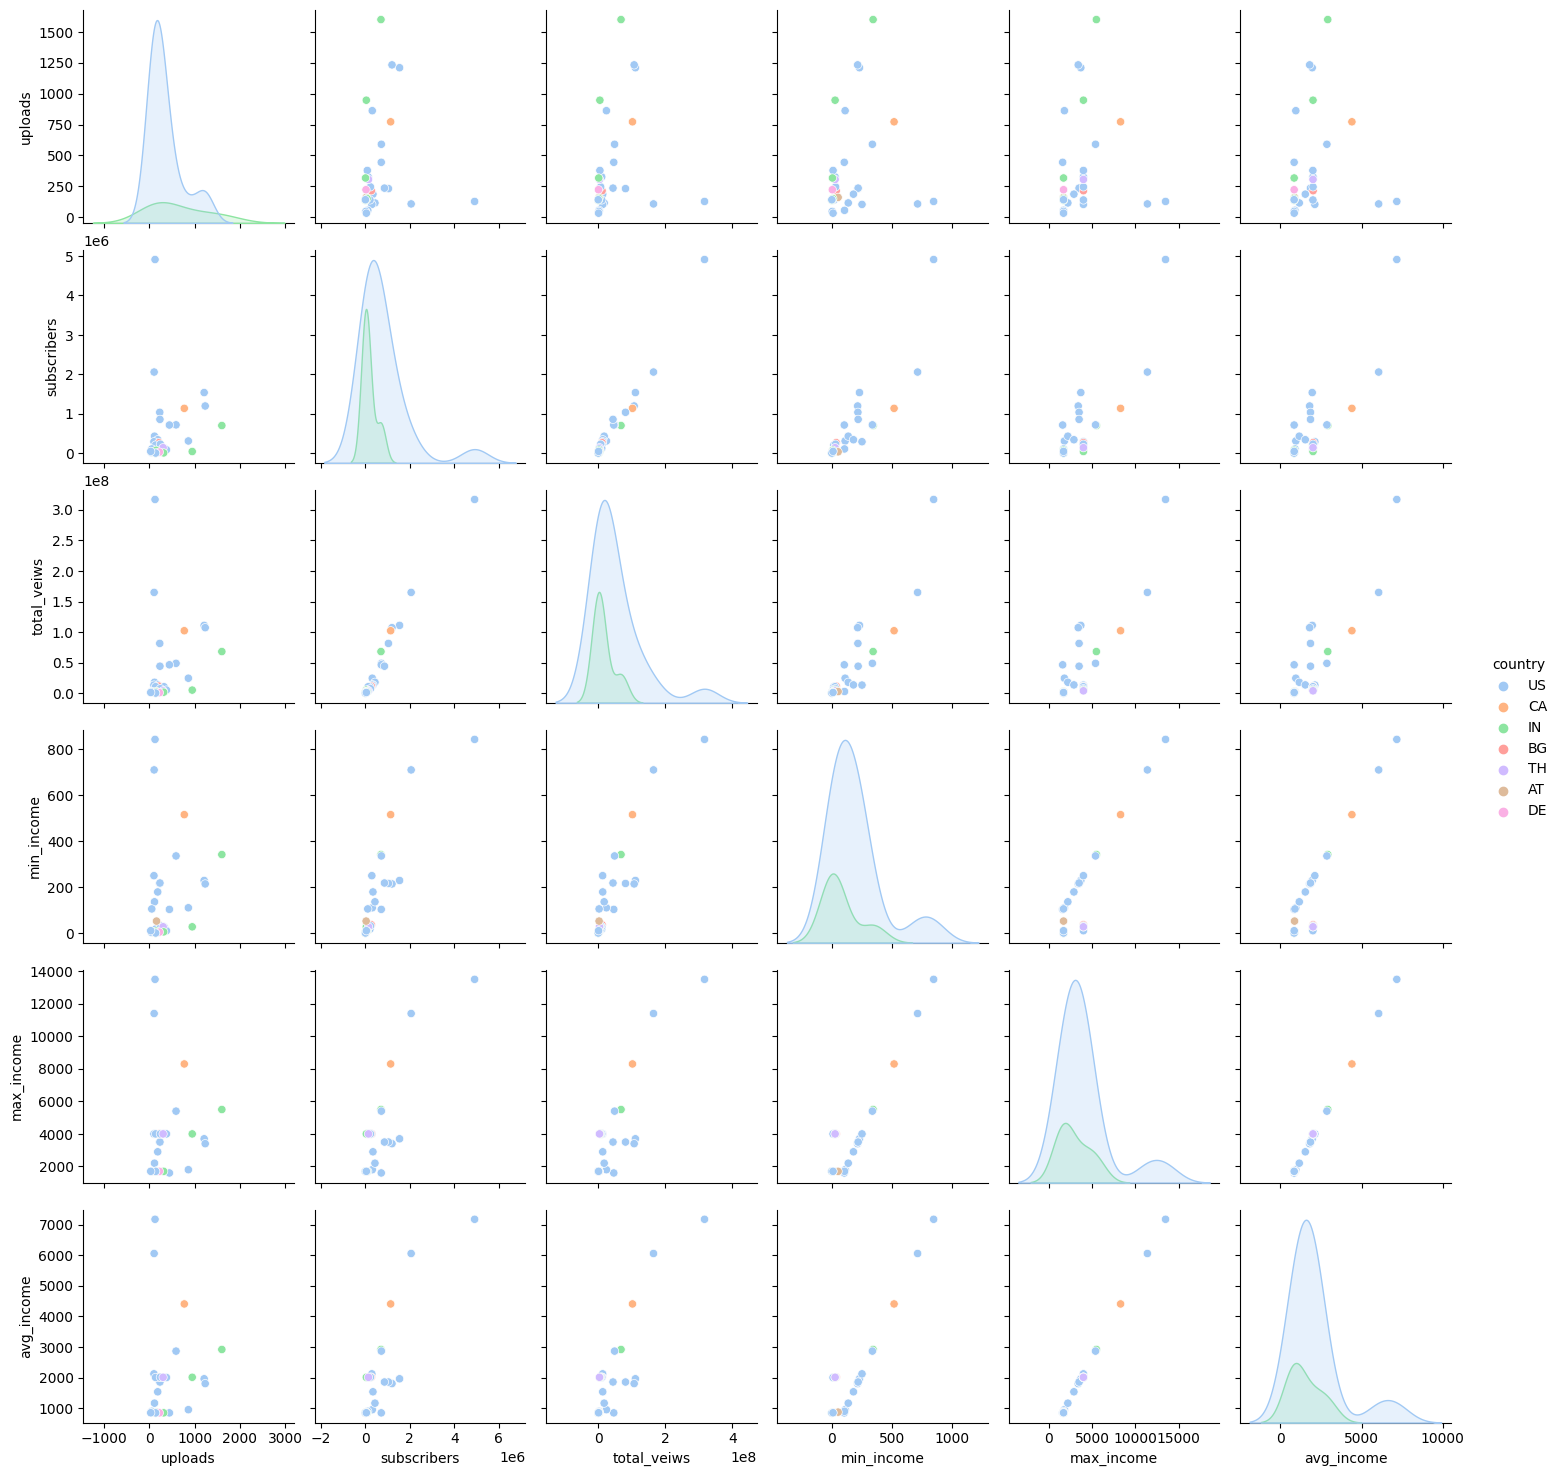

In [ ]:
sns.pairplot(df_copy, hue='country', palette="pastel")
plt.show()

<ipython-input-48-9a464a7e24ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), annot = True, cmap="PiYG", fmt='.2f', square=True)


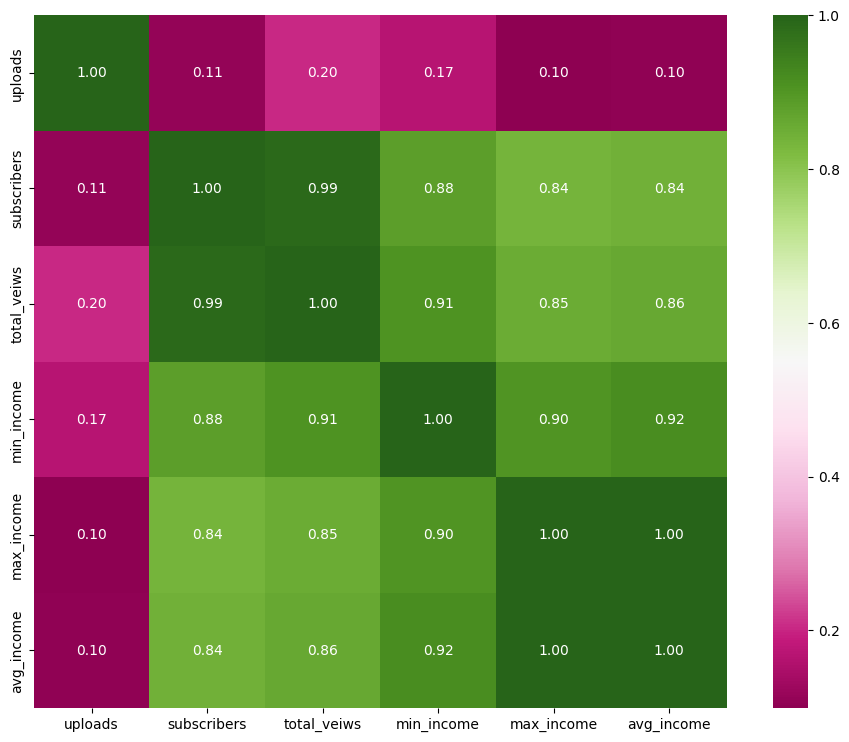

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df_copy.corr(), annot = True, cmap="PiYG", fmt='.2f', square=True)
plt.show()